## 1. Exploratory Data Analysis

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset

df = pd.read_csv('nyc_taxi_trip_duration.csv')

Let's check the data files! According to the data description we should find the following columns:

 - **id** - a unique identifier for each trip
 - **vendor_id** - a code indicating the provider associated with the trip record
 - **pickup_datetime** - date and time when the meter was engaged
 - **dropoff_datetime** - date and time when the meter was disengaged
 - **passenger_count** - the number of passengers in the vehicle (driver entered value)
 - **pickup_longitude** - the longitude where the meter was engaged
 - **pickup_latitude** - the latitude where the meter was engaged
 - **dropoff_longitude** - the longitude where the meter was disengaged
 - **dropoff_latitude** - the latitude where the meter was disengaged
 - **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
 - **trip_duration** - (target) duration of the trip in seconds

Here, we have 2 variables dropoff_datetime and store_and_fwd_flag which are not available before the trip starts and hence will not be used as features to the model.

In [3]:
print("No. of rows: ", df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  729322
No. of columns:  11


In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [6]:
#Missing values
print(df.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [7]:
# checking the datatype of all features in the dataset
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

**Categorical variables:**

id, pickup_datetime, dropoff_datetime, store_and_fwd_flag

**Continuous variables:**

vendor_id, passenger_count, pickup_longitude, pickup_latitude dropoff_longitude, dropoff_latitude

**Target Exploration:** trip_duratation

Here the trip_duration is a continuos variable, which determines that the problem is a regression problem.

understanding categorical variable

In [8]:
#Transforming pick_up and drop_off date time into a datetime object
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format= '%Y-%m-%d %H:%M:%S')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

In [9]:
#Transforming vendor_id and store_and_fwd to categorical data type
df['vendor_id'] = df['vendor_id'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

In [10]:
# Converting yes/no flag to 1 and 0 and transforming it into categorical data type
df['store_and_fwd_flag'] = 1 * (df.store_and_fwd_flag.values == 'Y')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

In [11]:
#Checking the data types again
df.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

In [12]:
df['check_trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).map(lambda x: x.total_seconds())

duration_difference = df[np.abs(df['check_trip_duration'].values  - df['trip_duration'].values) > 1]
duration_difference.shape

(0, 12)

This implies that there is no inconsistency in data wrt the drop location and trip duration

In [13]:
print("Startdate: ", df['pickup_datetime'].min())
print("Enddate: ", df['pickup_datetime'].max())

Startdate:  2016-01-01 00:01:14
Enddate:  2016-06-30 23:59:37


The trip duration data is collected from the time period of first 6 months from the year 2016

In [14]:
# extracting more features from the datetime variable
# For pick_up
df['pickup_day']=df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
# for Drop_off
df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_weekday'] = df['dropoff_datetime'].dt.weekday

In [15]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,check_trip_duration,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,400.0,29,16,0,29,16,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,1100.0,11,23,4,11,23,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,1635.0,21,17,6,21,18,6
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1141.0,5,9,1,5,10,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,848.0,17,6,2,17,6,2


### Univariate Visualization

Text(0, 0.5, 'Total Number of pickups')

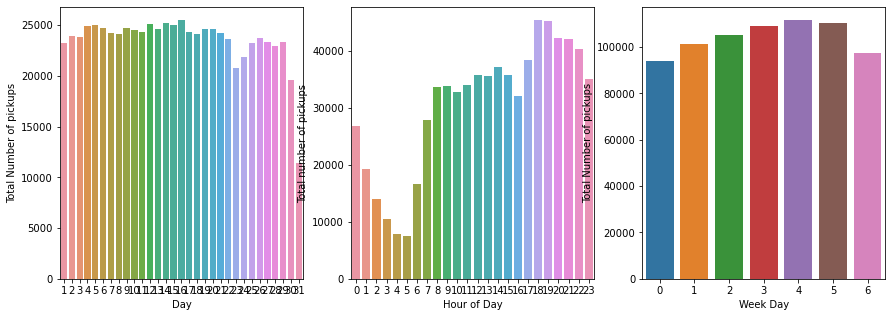

In [16]:
# Datetime features
plt.figure(figsize=(20, 5))

# Passenger Count
plt.subplot(141)
sns.countplot(df['pickup_day'])
plt.xlabel('Day')
plt.ylabel('Total Number of pickups')

# vendor_id
plt.subplot(142)
sns.countplot(df['pickup_hour'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')

# Passenger Count
plt.subplot(143)
sns.countplot(df['pickup_weekday'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')

* Trips are very low in early morning, while very high in the late evening hour in the day.
* Trip is on peak on Thursday(4).
* Trips are very low in early morning, while very high in the late evening hour in the day.

Text(0, 0.5, 'Frequency')

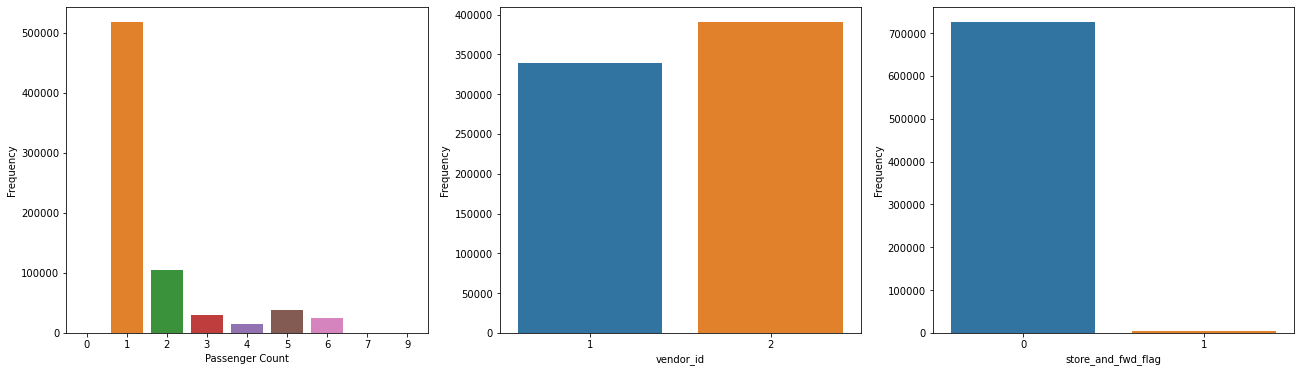

In [17]:
# Binary Features
plt.figure(figsize=(22, 6))
#fig, axs = plt.subplot(ncols=2)

# Passenger Count
plt.subplot(131)
sns.countplot(df['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')


# vendor_id
plt.subplot(132)
sns.countplot(df['vendor_id'])
plt.xlabel('vendor_id')
plt.ylabel('Frequency')

# store_and_fwd_flag
plt.subplot(133)
sns.countplot(df['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')

* Most of the trips involve only 1 passenger.
* Vendor 2 has more trips, compared to vendor 1.
* The value with 1 is very low in the store_and_fwd_flag variable. This suggests that almost no storing took place.

In [18]:
#Getting the summary of the trip_duration dataset
df['trip_duration'].describe()/3600 # Trip duration in hours

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

There is a trip with maximum duration of 538 hours. This is a huge outlier and might create problems at the prediction stage. One idea is to log transform this feature.

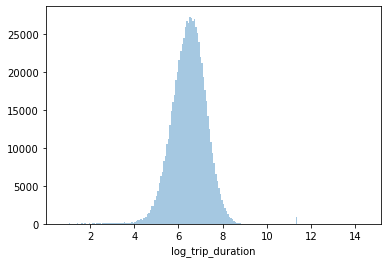

In [19]:
df['log_trip_duration'] = np.log(df['trip_duration'].values + 1)
sns.distplot(df['log_trip_duration'], kde = False, bins = 200)
plt.show()

We find:

1. The majority of rides follow a rather smooth distribution that looks almost log-normal with a peak just around exp(6.5)  i.e. about 17 minutes.
2. There are several suspiciously short rides with less than 10 seconds duration.
3. As discussed earlier, there are a few huge outliers near 12.

In [20]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,check_trip_duration,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,log_trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,400.0,29,16,0,29,16,0,5.993961
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,1100.0,11,23,4,11,23,4,7.003974
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,1635.0,21,17,6,21,18,6,7.400010
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1141.0,5,9,1,5,10,1,7.040536
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,848.0,17,6,2,17,6,2,6.744059


In [21]:
df.shape

(729322, 19)

### Lattitude & Longitude
Lets look at the geospatial or location features to check consistency. They should not vary much as we are only considering trips within New York city.

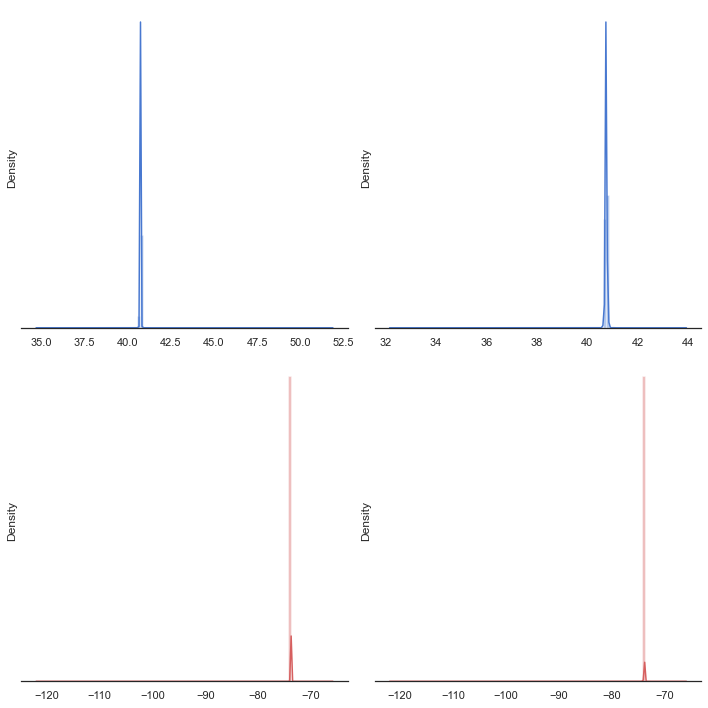

In [22]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[1,0])
sns.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[0,1])
sns.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

Findings - (Here, red represents pickup and dropoff Longitudes & blue represents pickup & dropoff lattitudes)

1. From the plot above it is clear that pick and drop latitude are centered around 40 to 41, and longitude are situated around -74 to -73. 
2. Some extreme co-ordinates has squeezed the plot such that we see a spike here
3. A good idea is to remove these outliers and look at the distribution more closely

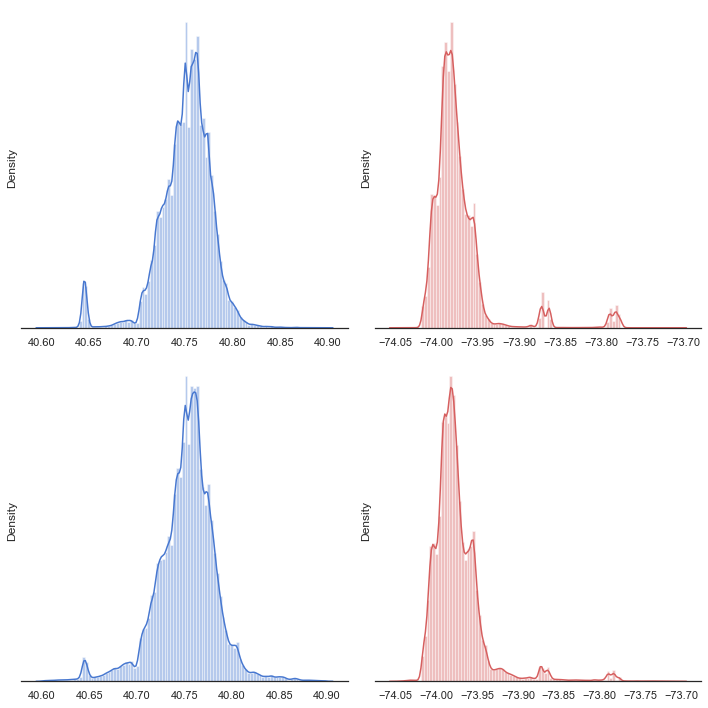

In [23]:
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude>40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df_data_new = df.copy()
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)#
sns.despine(left=True)
sns.distplot(df_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sns.distplot(df_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sns.distplot(df_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1, 0])
sns.distplot(df_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

* We have a much better view of the distribution of coordinates instead of spikes. And we see that most trips are concentrated between these lat long only with a few significant clusters.
* These clusters are represented by the numerous peaks in the lattitude and longitude histograms


### Bivariate Relations with Target

In [24]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'check_trip_duration', 'pickup_day', 'pickup_hour',
       'pickup_weekday', 'dropoff_day', 'dropoff_hour', 'dropoff_weekday',
       'log_trip_duration'],
      dtype='object')

### Trip Duration vs Vendor Id

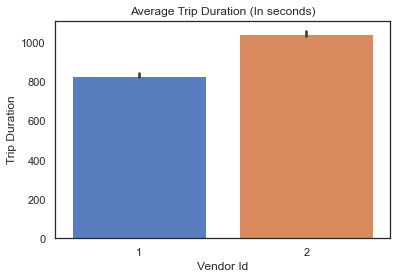

In [25]:
sns.barplot(x="vendor_id", y="trip_duration",data=df);
plt.title("Average Trip Duration (In seconds)");
plt.xlabel("Vendor Id");
plt.ylabel("Trip Duration");

* The average trip duration of vendor 2 is greater than vendor 1

### Correlation Heatmap

Let us quickly look at the correlation heatmap to check the correlations amongst all features.

In [26]:
df1 = df.drop(columns=['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude','pickup_latitude',
                       'dropoff_longitude','dropoff_latitude','trip_duration'])

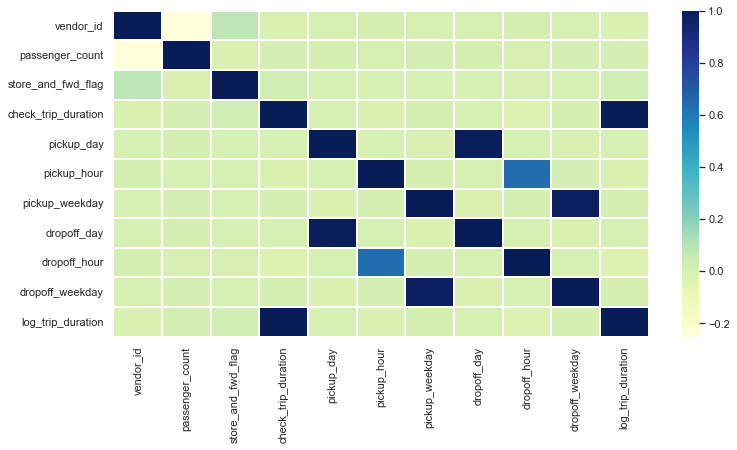

In [27]:
# checking the correlation among all features

plt.figure(figsize=(12, 6))
corr = df1.apply(lambda x: pd.factorize(x)[0]).corr()
#corr = df1.corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

## Basic Predictive Modeling

As we know that this is a regression problem then we have to predict discrete value, which is our target- trip_duration.

**So the evalutation metric for this model is - Root Mean Squared Error(RMSE)**

RMSE is a very simple metric to be used for evaluation. Since, we will be comparing our models and we will explicitly create a benchmark model as a baseline, RMSE will easy to compare these different models. Lower, the value of RMSE, better the model. Also, it will help in getting the elbow curve.

## Benchmark model

In [28]:
from sklearn.utils import shuffle

# Shuffling the Dataset
df = shuffle(df, random_state = 42)

#creating 4 divisions
div = int(df.shape[0]/4)

# We will split our data into 2 parts. The first part we will use to train our data and the 2nd part will be used for testing.
# 3 parts to train set and 1 part to test set
train = df.loc[:3*div+1,:]
test = df.loc[3*div+1:]

In [29]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,check_trip_duration,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,log_trip_duration
78016,id2332378,2,2016-01-22 23:28:55,2016-01-23 00:04:55,2,-73.985313,40.718601,-73.961151,40.661198,0,2160,2160.0,22,23,4,23,0,5,7.678326
38313,id2687968,1,2016-06-02 09:23:26,2016-06-02 09:28:21,1,-73.982719,40.754265,-73.973457,40.752434,0,295,295.0,2,9,3,2,9,3,5.690359
206534,id3998611,2,2016-06-11 15:26:21,2016-06-11 15:30:18,1,-73.978203,40.752541,-73.983177,40.756199,0,237,237.0,11,15,5,11,15,5,5.472271
564809,id2674901,2,2016-02-16 16:39:18,2016-02-16 16:51:15,1,-73.975250,40.787827,-73.950958,40.814068,0,717,717.0,16,16,1,16,16,1,6.576470
100394,id0158105,2,2016-02-01 22:29:48,2016-02-01 22:47:44,3,-73.862511,40.768929,-73.959373,40.766781,0,1076,1076.0,1,22,0,1,22,0,6.981935


In [30]:
test.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,check_trip_duration,pickup_day,pickup_hour,pickup_weekday,dropoff_day,dropoff_hour,dropoff_weekday,log_trip_duration
544645,id2991926,2,2016-01-09 12:10:59,2016-01-09 12:18:20,1,-73.979713,40.739605,-73.991188,40.723503,0,441,441.0,9,12,5,9,12,5,6.091310
307528,id3088194,1,2016-04-26 20:23:42,2016-04-26 20:41:50,1,-73.983772,40.738213,-74.010696,40.723618,0,1088,1088.0,26,20,1,26,20,1,6.993015
159533,id3555057,1,2016-04-05 11:30:18,2016-04-05 11:47:52,1,-73.990318,40.775635,-73.956398,40.766296,0,1054,1054.0,5,11,1,5,11,1,6.961296
246485,id0318634,2,2016-05-01 01:55:33,2016-05-01 02:26:04,1,-73.981110,40.760071,-73.863724,40.728016,0,1831,1831.0,1,1,6,1,2,6,7.513164
342223,id3481180,1,2016-05-07 09:51:41,2016-05-07 09:56:30,1,-73.975349,40.752922,-73.966606,40.760925,0,289,289.0,7,9,5,7,9,5,5.669881


In [31]:
# storing simple mean in a new column in the test set as "simple_mean"
test['simple_mean'] = train['trip_duration'].mean()

In [32]:
#calculating Root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt

simple_mean_error = sqrt(mean_squared_error(test['trip_duration'] , test['simple_mean']))
simple_mean_error

5601.322632830707

In [33]:
# storing simple mean in a new column in the test set as "simple_mean"
test['simple_mean'] = train['log_trip_duration'].mean()

In [34]:
#calculating Root mean squared error

simple_mean_error = sqrt(mean_squared_error(test['log_trip_duration'] , test['simple_mean']))
simple_mean_error

0.7878125218643683

In [35]:
# storing simple mean in a new column in the test set as "simple_mean"
test['simple_mean'] = train['pickup_weekday'].mean()

In [36]:
#calculating Root mean squared error

simple_mean_error = sqrt(mean_squared_error(test['pickup_weekday'] , test['simple_mean']))
simple_mean_error

1.953812983529539

In [37]:
trip_store = pd.pivot_table(train, values='log_trip_duration', index =['store_and_fwd_flag'], aggfunc=np.mean)
trip_store

,log_trip_duration
store_and_fwd_flag,
0,6.461943
1,6.634717


In [38]:
# initializing new column to zero
test['trip_store_mean'] = 0

# For every unique entry in Outlet_Identifier
for i in train['store_and_fwd_flag'].unique():
  # Assign the mean value corresponding to unique entry
  test['trip_store_mean'][test['store_and_fwd_flag'] == i] = train['log_trip_duration'][train['store_and_fwd_flag'] == i].mean()

In [39]:
#calculating Root mean squared error
trip_store_error = sqrt(mean_squared_error(test['log_trip_duration'] , test['trip_store_mean'] ))
trip_store_error

0.7876802632869175

In [40]:
combo = pd.pivot_table(train, values = 'log_trip_duration', index = ['vendor_id','pickup_weekday'], aggfunc = np.mean)
combo

log_trip_duration
vendor_id pickup_weekday                   
1         0                        6.410014
          1                        6.472321
          2                        6.496433
          3                        6.501830
          4                        6.485100
          5                        6.398298
          6                        6.354262
2         0                        6.433793
          1                        6.501639
          2                        6.528047
          3                        6.541486
          4                        6.509883
          5                        6.426958
          6                        6.381495

In [41]:
# Initiating new empty column
test['Super_mean'] = 0

# Assigning variables to strings ( to shorten code length)
s2 = 'vendor_id'
s1 = 'pickup_weekday'

# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s2].unique():
    # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
    test['Super_mean'][(test[s1] == i) & (test[s2]==str(j))] = train['log_trip_duration'][(train[s1] == i) & (train[s2]==str(j))].mean()

In [42]:
#calculating Root mean squared error
super_mean_error = sqrt(mean_squared_error(test['log_trip_duration'] , test['Super_mean']))
super_mean_error

6.513051709061478

As after the Calculation we get the Error value as : **0.7878** for our **Benchmark Model**

## Linear Regression model

In [43]:
X = df1.drop('log_trip_duration', axis=1)
y = df1['log_trip_duration']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Test Score

In [45]:
y_pred = lr.predict(X_test)

lm_test_rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of linear regressor model: ", lm_test_rmse)

RMSE of linear regressor model:  0.7388306980034242


Train Score

In [46]:
y_pred = lr.predict(X_train)

lm_train_rmse = sqrt(mean_squared_error(y_train, y_pred))

print("RMSE of linear regressor model: ", lm_train_rmse)

RMSE of linear regressor model:  0.7480822578978337


## Decision Tree model

In [47]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Test Score

In [48]:
y_pred = dtr.predict(X_test)

dtr_test_rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of decision tree model: ", dtr_test_rmse)

RMSE of decision tree model:  0.0004396443860147491


Train Score

In [49]:
y_pred = dtr.predict(X_train)

dtr_train_rmse = sqrt(mean_squared_error(y_train, y_pred))

print("RMSE of decision tree model: ", dtr_train_rmse)

RMSE of decision tree model:  2.878313041578955e-14


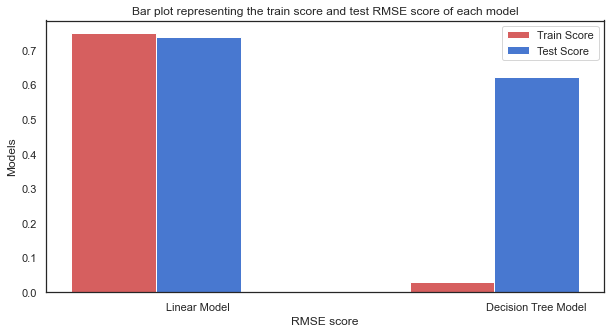

In [50]:
plt.figure(figsize=[10, 5])

train_scores = [0.748, 0.029]
test_scores = [0.738, 0.623]

# Passing the parameters to the bar function
X = np.arange(len(train_scores))


# Passing the parameters to the bar function, this is the main function which creates the bar plot
plt.bar(X, train_scores, color = 'r', width = 0.25)
plt.bar(X + 0.25, test_scores, color = 'b', width = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Train Score', 'Test Score'])

labels = ['Linear Model', 'Decision Tree Model']

# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(2)], labels)

# Giving the tilte for the plot
plt.title("Bar plot representing the train score and test RMSE score of each model")

plt.xlabel('RMSE score')
plt.ylabel('Models')

plt.show()